In [1]:
import os

# show where you are
print("Current directory:", os.getcwd())
print("\nFiles here:", os.listdir())

# show what’s inside sample_data (if it exists)
if os.path.exists("sample_data"):
    print("\nFiles inside sample_data:", os.listdir("sample_data"))


Current directory: /content

Files here: ['.config', 'ICICI_Bank_hourly.csv', 'Wipro_hourly.csv', 'NTPC_hourly.csv', 'Ambuja_Cement_hourly.csv', 'sample_data']

Files inside sample_data: ['anscombe.json', 'README.md', 'mnist_test.csv', 'california_housing_test.csv', 'california_housing_train.csv', 'mnist_train_small.csv']


In [2]:
import pandas as pd

# STEP 0: LOAD STOCK DATA

df_icici = pd.read_csv("ICICI_Bank_hourly.csv")
df_ntpc = pd.read_csv("NTPC_hourly.csv")
df_ambuja = pd.read_csv("Ambuja_Cement_hourly.csv")
df_wipro = pd.read_csv("Wipro_hourly.csv")

# Optional cleanup — make column names consistent
for df in [df_icici, df_ntpc, df_ambuja, df_wipro]:
    df.columns = [col.strip().capitalize() for col in df.columns]

print("✅ Datasets loaded successfully.")
for name, df in zip(["ICICI", "NTPC", "Ambuja", "Wipro"], [df_icici, df_ntpc, df_ambuja, df_wipro]):
    print(f"{name}: {df.shape[0]} rows | columns: {list(df.columns)}")


✅ Datasets loaded successfully.
ICICI: 5076 rows | columns: ['Price', 'Close', 'High', 'Low', 'Open', 'Volume']
NTPC: 5074 rows | columns: ['Price', 'Close', 'High', 'Low', 'Open', 'Volume']
Ambuja: 5076 rows | columns: ['Price', 'Close', 'High', 'Low', 'Open', 'Volume']
Wipro: 5076 rows | columns: ['Price', 'Close', 'High', 'Low', 'Open', 'Volume']


In [3]:
!pip install pandas-ta


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.3/240.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 114.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 14.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.43.0
    Uninstalling llvmlite-0.43.0:
      Successfully uninstalled llvmlite-0.43.0
  Attempting uninstall: pandas
    Found existing ins

In [4]:
# Add the indicator function we built earlier
import pandas_ta as ta
import pandas as pd

def add_indicators(df):
    df = df.copy()
    df.columns = [c.lower().strip() for c in df.columns]

    # Convert numeric columns
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    if 'close' not in df.columns:
        if 'price' in df.columns:
            df['close'] = df['price']
        else:
            raise KeyError("No 'close' or 'price' column found!")

    df['ema_10'] = ta.ema(df['close'], length=10)
    df['ema_30'] = ta.ema(df['close'], length=30)
    df['rsi'] = ta.rsi(df['close'], length=14)
    df['roc'] = ta.roc(df['close'], length=10)
    df['momentum'] = ta.mom(df['close'], length=10)

    df = df.dropna().reset_index(drop=True)
    return df

# Apply to all 4
df_icici_ind = add_indicators(df_icici)
df_ntpc_ind = add_indicators(df_ntpc)
df_ambuja_ind = add_indicators(df_ambuja)
df_wipro_ind = add_indicators(df_wipro)

print("✅ Indicators added successfully!")
df_icici_ind.head()


✅ Indicators added successfully!


,price,close,high,low,open,volume,ema_10,ema_30,rsi,roc,momentum


In [5]:
df_icici_ind.shape

(0, 11)

In [6]:
import pandas_ta as ta
import pandas as pd

def add_indicators(df):
    df = df.copy()
    df.columns = [c.lower().strip() for c in df.columns]

    # Convert numeric columns
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    if 'close' not in df.columns:
        if 'price' in df.columns:
            df['close'] = df['price']
        else:
            raise KeyError("No 'close' or 'price' column found!")

    # Add indicators
    df['ema_10'] = ta.ema(df['close'], length=10)
    df['ema_30'] = ta.ema(df['close'], length=30)
    df['rsi'] = ta.rsi(df['close'], length=14)
    df['roc'] = ta.roc(df['close'], length=10)
    df['momentum'] = ta.mom(df['close'], length=10)

    # Fill missing values instead of dropping all
    df = df.fillna(method='ffill').fillna(method='bfill')
    df = df.reset_index(drop=True)
    return df

In [7]:
df_icici_ind = add_indicators(df_icici)
print(df_icici_ind.shape)
df_icici_ind.head()

(5076, 11)


/tmp/ipython-input-1080708539.py:26: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


,price,close,high,low,open,volume,ema_10,ema_30,rsi,roc,momentum
0,NaN,911.299988,918.400024,909.000000,917.099976,0.0,908.431252,907.17143,100.000000,-0.790081,-7.200012
1,NaN,911.299988,918.400024,909.000000,917.099976,0.0,908.431252,907.17143,100.000000,-0.790081,-7.200012
2,NaN,911.299988,918.400024,909.000000,917.099976,0.0,908.431252,907.17143,100.000000,-0.790081,-7.200012
3,NaN,912.150024,914.200012,910.799988,911.299988,944895.0,908.431252,907.17143,100.000000,-0.790081,-7.200012
4,NaN,907.799988,913.900024,907.700012,912.349976,1461326.0,908.431252,907.17143,71.753949,-0.790081,-7.200012


In [8]:
print(df_icici.shape)
df_icici.head()
df_icici.info()

(5076, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5076 entries, 0 to 5075
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   5076 non-null   object
 1   Close   5075 non-null   object
 2   High    5075 non-null   object
 3   Low     5075 non-null   object
 4   Open    5075 non-null   object
 5   Volume  5075 non-null   object
dtypes: object(6)
memory usage: 238.1+ KB


In [9]:
!head -n 10 sample_data/ICICI_Bank_hourly.csv

head: cannot open 'sample_data/ICICI_Bank_hourly.csv' for reading: No such file or directory


In [1]:
from google.colab import files
uploaded = files.upload()


Saving Wipro_hourly.csv to Wipro_hourly (1).csv
Saving NTPC_hourly.csv to NTPC_hourly (1).csv
Saving ICICI_Bank_hourly.csv to ICICI_Bank_hourly (1).csv
Saving Ambuja_Cement_hourly.csv to Ambuja_Cement_hourly (1).csv


In [2]:
import pandas as pd

df_icici = pd.read_csv("ICICI_Bank_hourly.csv")
print("Shape:", df_icici.shape)
print(df_icici.head(10))

Shape: (5076, 6)
                       Price              Close               High  \
0                     Ticker       ICICIBANK.NS       ICICIBANK.NS   
1                   Datetime                NaN                NaN   
2  2022-11-01 03:45:00+00:00  911.2999877929688  918.4000244140625   
3  2022-11-01 04:45:00+00:00  912.1500244140625  914.2000122070312   
4  2022-11-01 05:45:00+00:00  907.7999877929688  913.9000244140625   
5  2022-11-01 06:45:00+00:00  902.2999877929688  908.2999877929688   
6  2022-11-01 07:45:00+00:00  904.2000122070312  904.9500122070312   
7  2022-11-01 08:45:00+00:00  908.9500122070312  909.7999877929688   
8  2022-11-01 09:45:00+00:00  908.2000122070312  910.0999755859375   
9  2022-11-02 03:45:00+00:00  912.5499877929688  916.4000244140625   

                 Low               Open        Volume  
0       ICICIBANK.NS       ICICIBANK.NS  ICICIBANK.NS  
1                NaN                NaN           NaN  
2              909.0  917.0999755859375     

In [3]:
print(df_icici.columns.tolist())

['Price', 'Close', 'High', 'Low', 'Open', 'Volume']


In [4]:
import pandas as pd

df_icici = pd.read_csv("ICICI_Bank_hourly.csv", skiprows=[1])

# Clean up column names
df_icici.columns = [c.strip().lower() for c in df_icici.columns]

# Drop missing and invalid rows
df_icici = df_icici.dropna().reset_index(drop=True)

# Convert numeric columns
num_cols = ['close', 'high', 'low', 'open', 'volume']
for col in num_cols:
    df_icici[col] = pd.to_numeric(df_icici[col], errors='coerce')

print(df_icici.shape)
print(df_icici.head())


(5074, 6)
                       price       close        high         low        open  \
0  2022-11-01 03:45:00+00:00  911.299988  918.400024  909.000000  917.099976   
1  2022-11-01 04:45:00+00:00  912.150024  914.200012  910.799988  911.299988   
2  2022-11-01 05:45:00+00:00  907.799988  913.900024  907.700012  912.349976   
3  2022-11-01 06:45:00+00:00  902.299988  908.299988  899.700012  908.150024   
4  2022-11-01 07:45:00+00:00  904.200012  904.950012  901.700012  902.150024   

      volume  
0        0.0  
1   944895.0  
2  1461326.0  
3  1911000.0  
4  1027919.0  


In [10]:
import numpy as np

def add_indicators(df):
    df['SMA_10'] = df['Close'].rolling(window=10).mean()
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

    delta = df['Close'].diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(gain).rolling(14).mean()
    avg_loss = pd.Series(loss).rolling(14).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))

    df = df.dropna().reset_index(drop=True)
    return df

In [12]:
print(df_icici.columns)

Index(['price', 'close', 'high', 'low', 'open', 'volume'], dtype='object')


In [15]:
df_icici.rename(columns={
    'price': 'Price',
    'close': 'Close',
    'high': 'High',
    'low': 'Low',
    'open': 'Open',
    'volume': 'Volume'
}, inplace=True)

In [18]:
df_icici_ind = add_indicators(df_icici)
print("Indicators added successfully!")
print(df_icici_ind.head())

Indicators added successfully!
                       Price       Close        High         Low        Open  \
0  2022-11-11 03:45:00+00:00  925.299988  928.000000  920.700012  925.049988   
1  2022-11-11 04:45:00+00:00  914.500000  925.950012  913.700012  925.349976   
2  2022-11-11 05:45:00+00:00  908.099976  915.000000  907.849976  914.349976   
3  2022-11-11 06:45:00+00:00  909.799988  910.250000  905.400024  908.099976   
4  2022-11-11 07:45:00+00:00  905.799988  910.700012  904.799988  909.799988   

      Volume      SMA_10      SMA_50      EMA_20        RSI  
0        0.0  910.405011  908.852003  910.795909  64.878639  
1  1555280.0  910.640009  908.916003  911.148679  52.916658  
2  2189720.0  910.705005  908.835002  910.858327  50.197580  
3  2002430.0  910.715002  908.875002  910.757532  51.631488  
4  2617572.0  910.520001  908.945002  910.285385  44.539414  


In [20]:
df_icici_ind = df_icici_ind.ffill().bfill()

In [23]:
print(df_icici_ind.columns)

Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume', 'SMA_10', 'SMA_50',
       'EMA_20', 'RSI'],
      dtype='object')


In [24]:
data = df_icici_ind[['Close', 'EMA_20', 'SMA_10', 'SMA_50', 'RSI']].copy()

In [26]:
# Function to create sequences for LSTM
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i, 0])  # Predict the 'Close' price
    return np.array(X), np.array(y)

In [27]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = np.array(scaled_data)

X, y = create_sequences(scaled_data, seq_length=60)
print("✅ Sequence shape:", X.shape, y.shape)

✅ Sequence shape: (4965, 60, 5) (4965,)


In [29]:
data.columns = [col.lower() for col in data.columns]

In [32]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = np.array(scaled_data)

def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i, 0])  # Predict close price
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)
print(" Sequence shape:", X.shape, y.shape)

 Sequence shape: (4965, 60, 5) (4965,)


In [34]:
df_icici_ind['EMA_30'] = df_icici_ind['Close'].ewm(span=30, adjust=False).mean()
df_icici_ind['ROC'] = df_icici_ind['Close'].pct_change(periods=5) * 100
df_icici_ind['Momentum'] = df_icici_ind['Close'] - df_icici_ind['Close'].shift(5)
df_icici_ind.dropna(inplace=True)

In [36]:
data = df_icici_ind[['Close', 'EMA_20', 'EMA_30', 'RSI', 'ROC', 'Momentum']].copy()

In [38]:
df_icici_ind['EMA_10'] = df_icici_ind['Close'].ewm(span=10, adjust=False).mean()
df_icici_ind['EMA_30'] = df_icici_ind['Close'].ewm(span=30, adjust=False).mean()
df_icici_ind['ROC'] = df_icici_ind['Close'].pct_change(periods=5) * 100
df_icici_ind['Momentum'] = df_icici_ind['Close'] - df_icici_ind['Close'].shift(5)
df_icici_ind.dropna(inplace=True)

In [39]:
data = df_icici_ind[['Close', 'EMA_10', 'EMA_30', 'RSI', 'ROC', 'Momentum']].copy()

In [40]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = np.array(scaled_data)

def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i, 0])  # predict 'close' price
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)
print("✅ Sequence shape:", X.shape, y.shape)

✅ Sequence shape: (4955, 60, 6) (4955,)


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,313 (208.25 KB)

 Trainable params: 53,313 (208.25 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
history = model.fit(
    X, y,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    shuffle=False
)

Epoch 1/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - loss: 0.0062 - val_loss: 0.0649
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - loss: 0.0128 - val_loss: 0.0871
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 18s 67ms/step - loss: 0.0118 - val_loss: 0.0527
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - loss: 0.0106 - val_loss: 0.0695
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.0147 - val_loss: 0.0491
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - loss: 0.0126 - val_loss: 0.0468
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - loss: 0.0136 - val_loss: 0.0353
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.0094 - val_loss: 0.0265
Epoch 9/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 0.0105 - val_loss: 0.0201
Epoch 10/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - loss: 0.0080 - val_loss: 0.0150
Epoch 11/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - loss: 0.0050 - val_loss: 0.0097
Epoch 12/50
124/124 ━━━━━━━━━━━━━━━

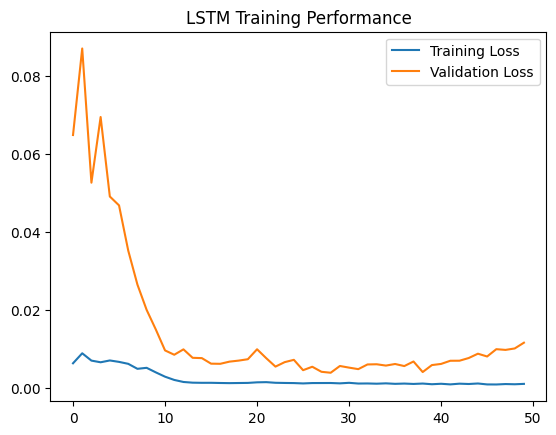

In [44]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('LSTM Training Performance')
plt.show()

Training LSTM...
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - loss: 0.0053 - val_loss: 0.0027
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 4.6450e-04 - val_loss: 0.0031
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 3.2953e-04 - val_loss: 9.2713e-04
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 2.9805e-04 - val_loss: 0.0012
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 2.9819e-04 - val_loss: 9.1905e-04
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - loss: 2.4839e-04 - val_loss: 0.0012
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - loss: 3.1367e-04 - val_loss: 0.0015
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 2.6586e-04 - val_loss: 0.0043
Epoch 9/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - loss: 2.8711e-04 - val_loss: 0.0041
Epoch 10/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 2.7419e-04 - val_loss: 0.0014
Epoch 11/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - loss: 2.3131e-04 - val_loss: 0.0013
E

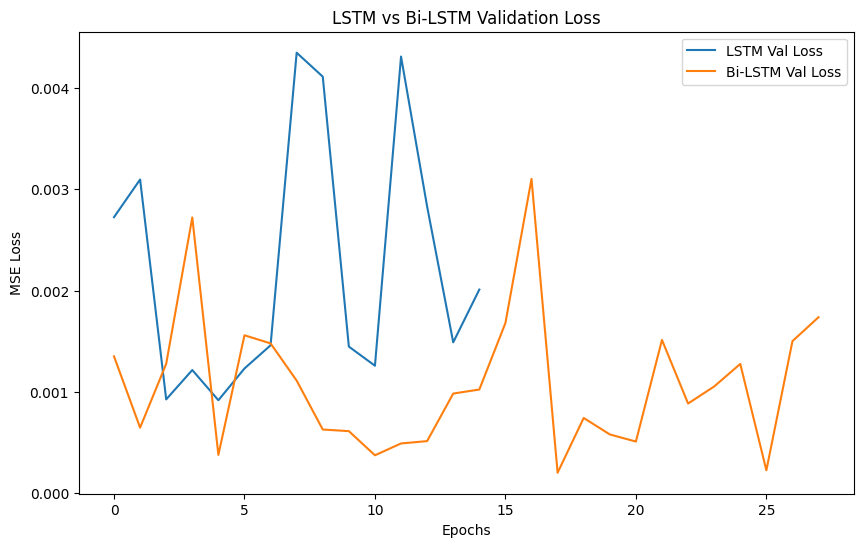

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Split data into train and test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# --- Model 1: Regular LSTM ---
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')

# --- Model 2: Bidirectional LSTM ---
bilstm_model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(X.shape[1], X.shape[2])),
    Dropout(0.2),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dense(32, activation='relu'),
    Dense(1)
])

bilstm_model.compile(optimizer='adam', loss='mse')

# --- Train both ---
print("Training LSTM...")
history_lstm = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32,
                              validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

print("\nTraining Bi-LSTM...")
history_bilstm = bilstm_model.fit(X_train, y_train, epochs=50, batch_size=32,
                                  validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

# --- Plot training performance ---
plt.figure(figsize=(10,6))
plt.plot(history_lstm.history['val_loss'], label='LSTM Val Loss')
plt.plot(history_bilstm.history['val_loss'], label='Bi-LSTM Val Loss')
plt.title("LSTM vs Bi-LSTM Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step
LSTM  → RMSE: 20.8528, MAE: 18.2509
BiLSTM → RMSE: 9.8194, MAE: 7.5991


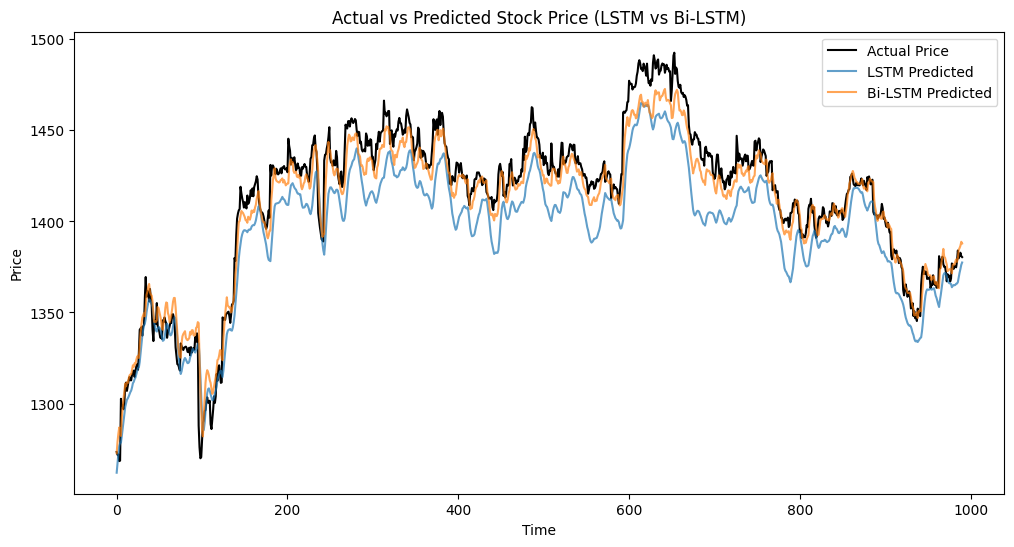

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# --- Predict on test set ---
y_pred_lstm = lstm_model.predict(X_test)
y_pred_bilstm = bilstm_model.predict(X_test)

# --- Invert scaling to get real price values ---
# Rebuild full-length array for inverse transform
y_test_full = np.zeros((len(y_test), data.shape[1]))
y_pred_full_lstm = np.zeros((len(y_pred_lstm), data.shape[1]))
y_pred_full_bilstm = np.zeros((len(y_pred_bilstm), data.shape[1]))

y_test_full[:, 0] = y_test
y_pred_full_lstm[:, 0] = y_pred_lstm.flatten()
y_pred_full_bilstm[:, 0] = y_pred_bilstm.flatten()

y_test_real = scaler.inverse_transform(y_test_full)[:, 0]
y_pred_real_lstm = scaler.inverse_transform(y_pred_full_lstm)[:, 0]
y_pred_real_bilstm = scaler.inverse_transform(y_pred_full_bilstm)[:, 0]

# --- Compute metrics ---
rmse_lstm = np.sqrt(mean_squared_error(y_test_real, y_pred_real_lstm))
rmse_bilstm = np.sqrt(mean_squared_error(y_test_real, y_pred_real_bilstm))

mae_lstm = mean_absolute_error(y_test_real, y_pred_real_lstm)
mae_bilstm = mean_absolute_error(y_test_real, y_pred_real_bilstm)

print(f"LSTM  → RMSE: {rmse_lstm:.4f}, MAE: {mae_lstm:.4f}")
print(f"BiLSTM → RMSE: {rmse_bilstm:.4f}, MAE: {mae_bilstm:.4f}")

# --- Plot predictions ---
plt.figure(figsize=(12,6))
plt.plot(y_test_real, label='Actual Price', color='black')
plt.plot(y_pred_real_lstm, label='LSTM Predicted', alpha=0.7)
plt.plot(y_pred_real_bilstm, label='Bi-LSTM Predicted', alpha=0.7)
plt.title("Actual vs Predicted Stock Price (LSTM vs Bi-LSTM)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# --- Metrics ---
mse_lstm = mean_squared_error(y_test_real, y_pred_real_lstm)
rmse_lstm = np.sqrt(mse_lstm)
mae_lstm = mean_absolute_error(y_test_real, y_pred_real_lstm)
r2_lstm = r2_score(y_test_real, y_pred_real_lstm)

mse_bilstm = mean_squared_error(y_test_real, y_pred_real_bilstm)
rmse_bilstm = np.sqrt(mse_bilstm)
mae_bilstm = mean_absolute_error(y_test_real, y_pred_real_bilstm)
r2_bilstm = r2_score(y_test_real, y_pred_real_bilstm)

# --- Print results ---
print("📊 Model Performance Metrics:")
print(f"LSTM   → MSE: {mse_lstm:.4f}, RMSE: {rmse_lstm:.4f}, MAE: {mae_lstm:.4f}, R²: {r2_lstm:.4f}")
print(f"Bi-LSTM → MSE: {mse_bilstm:.4f}, RMSE: {rmse_bilstm:.4f}, MAE: {mae_bilstm:.4f}, R²: {r2_bilstm:.4f}")


📊 Model Performance Metrics:
LSTM   → MSE: 434.8374, RMSE: 20.8528, MAE: 18.2509, R²: 0.7797
Bi-LSTM → MSE: 96.4206, RMSE: 9.8194, MAE: 7.5991, R²: 0.9512


 Models saved successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


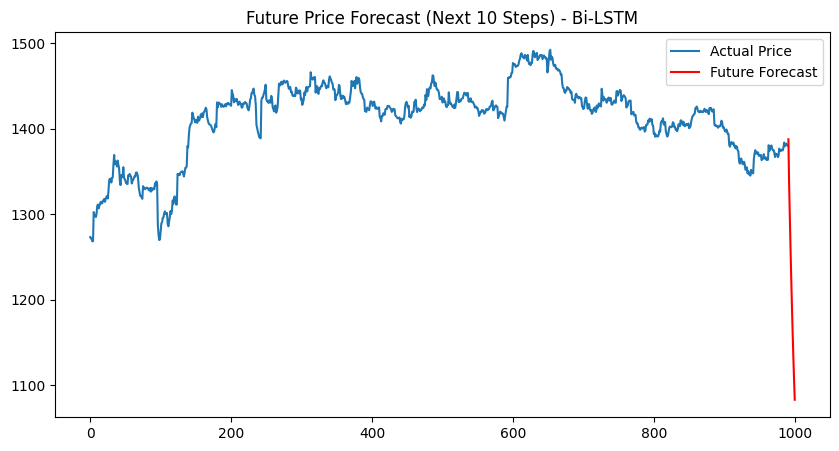

In [49]:
from tensorflow.keras.models import save_model
import numpy as np
import matplotlib.pyplot as plt

# --- Save models ---
lstm_model.save("lstm_model_icici.h5")
bilstm_model.save("bilstm_model_icici.h5")
print(" Models saved successfully!")

# --- Predict next 10 future prices using the Bi-LSTM model ---
last_sequence = X[-1]  # last 60 timesteps
future_predictions = []

num_future_steps = 10
current_sequence = last_sequence

for _ in range(num_future_steps):
    next_pred = bilstm_model.predict(current_sequence.reshape(1, 60, X.shape[2]))[0][0]

    # Append prediction and roll the window forward
    future_predictions.append(next_pred)
    current_sequence = np.vstack([current_sequence[1:], np.append(next_pred, [0]*(X.shape[2]-1))])

# Inverse scale predictions to real price range
scaled_future = np.zeros((num_future_steps, data.shape[1]))
scaled_future[:, 0] = future_predictions
future_prices = scaler.inverse_transform(scaled_future)[:, 0]

# --- Plot future predictions ---
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test_real, label='Actual Price')
plt.plot(range(len(y_test), len(y_test) + num_future_steps), future_prices, label='Future Forecast', color='red')
plt.title("Future Price Forecast (Next 10 Steps) - Bi-LSTM")
plt.legend()
plt.show()